In [136]:
import numpy as np
import matplotlib.pyplot as plt

In [137]:
N_GRAPH = 1000

In [138]:
def get_xs(xl, xr, n):
    if n == 1:
        return np.array([xl])
    s = (xr - xl) / (n - 1)
    return np.arange(xl, xr + 10 ** -9, s)

In [139]:
def get_diff(xs, f1, f2):
    return list(map(lambda x: abs(f1(x) - f2(x)), xs))

In [140]:
def draw(xs, ys, names=None):
    if type(xs) is not list:
        xs = [xs]
        ys = [ys]
        if names is not None:
            names = [names]
            
    n = len(xs)
    for i in range(n):
        plt.plot(xs[i], ys[i])
        
    if names is not None:
        plt.legend(names)
    plt.show()

In [141]:
def build_matrix(R, N, d1, d2, d3):
    h = R / N
    coefs = [-2 / (i * h) for i in range(1, N)]
    A = np.zeros((N - 1, N - 1))
    for i in range(0, N - 1):
        if i != 0:
            A[i][i - 1] = d1(h, coefs[i - 1])
        A[i][i] = d2(h, coefs[i])
        if i != N - 2:
            A[i][i + 1] = d3(h, coefs[i + 1])
    return -A / 2

def get_matrix(R, N):
    return build_matrix(R, N, 
                       lambda h, c: 1 / h ** 2,
                       lambda h, c: -(2 / h ** 2 + c),
                       lambda h, c: 1 / h ** 2)

In [142]:
R = 100
N = 5000
A = get_matrix(R, N)
ls, vs = np.linalg.eig(A)
inds = np.argsort(ls)

print("First 5 eigenvalues:")
print(ls[inds][:5])

First 5 eigenvalues:
[-0.49995001 -0.12499688 -0.05555494 -0.0312498  -0.01999989]


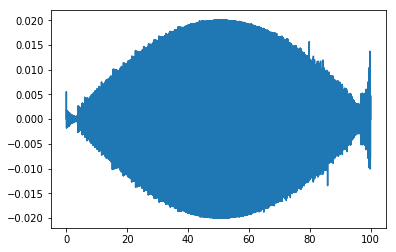

In [143]:
num = 0
v = vs[inds][num]

xs = get_xs(0, R, N + 1)
ys = [0] + v.tolist() + [0]

draw(xs, ys)

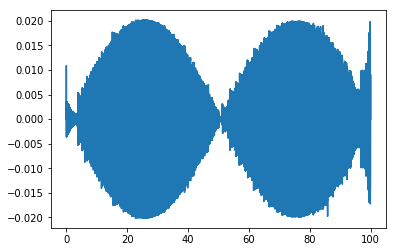

In [144]:
num = 1
v = vs[inds][num]

xs = get_xs(0, R, N + 1)
ys = [0] + v.tolist() + [0]

draw(xs, ys)

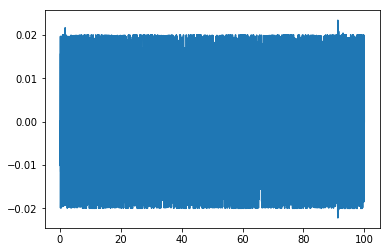

In [145]:
num = 2
v = vs[inds][num]

xs = get_xs(0, R, N + 1)
ys = [0] + v.tolist() + [0]

draw(xs, ys)

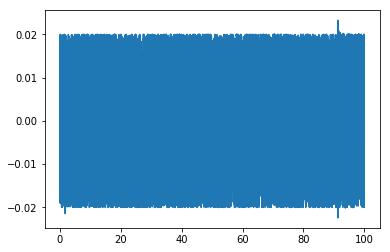

In [146]:
num = 3
v = vs[inds][num]

xs = get_xs(0, R, N + 1)
ys = [0] + v.tolist() + [0]

draw(xs, ys)

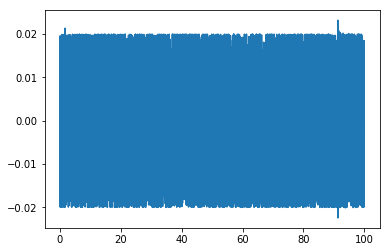

In [147]:
num = 4
v = vs[inds][num]

xs = get_xs(0, R, N + 1)
ys = [0] + v.tolist() + [0]

draw(xs, ys)

In [148]:
def get_matrix_numerov(R, N):
    A = build_matrix(R, N,
                     lambda h, c: 1 / h ** 4 - 1 / 12 * c / h ** 2,
                     lambda h, c: - (2 / h ** 4 + c - 1 / 6 * c / h ** 2),
                     lambda h, c: 1 / h ** 4 - 1 / 12 * c / h ** 2)
    
    
    B = build_matrix(R, N,
                     lambda h, c: 1 / h ** 2 / 12,
                     lambda h, c: 1 - 1 / (6 * h ** 2),
                     lambda h, c: 1 / h ** 2 / 12)
    
    return -np.matmul(np.linalg.inv(B), A) / 2

In [149]:
def get_real_eigenvalues(n):
    return [-1 / (2 * (n + 1) ** 2) for n in range(5)]

In [150]:
def get_max_error(getter, R, N):
    A = getter(R, N)
    c = np.sort(np.linalg.eig(A)[0])[:5]
    r = get_real_eigenvalues(N)
    return max(abs(c - r))

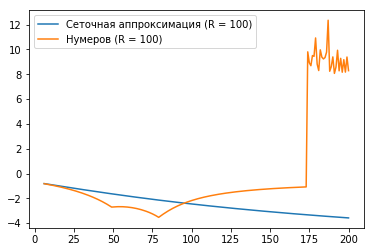

In [151]:
R = 100
N_min = 6
N_max = 200

Ns = range(N_min, N_max + 1)

err1 = list(map(lambda n: get_max_error(get_matrix, R, n), Ns))
err2 = list(map(lambda n: get_max_error(get_matrix_numerov, R, n), Ns))

Ns = [Ns] * 2
err = [err1, err2]
names = ["Сеточная аппроксимация (R = " + str(R) + ")", 
         "Нумеров (R = " + str(R) + ")"]

err = np.array(err)
err = np.log(err)

draw(Ns, err, names)

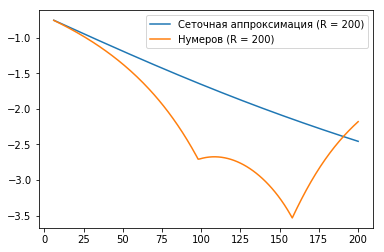

In [152]:
R = 200
N_min = 6
N_max = 200

Ns = range(N_min, N_max + 1)

err1 = list(map(lambda n: get_max_error(get_matrix, R, n), Ns))
err2 = list(map(lambda n: get_max_error(get_matrix_numerov, R, n), Ns))

Ns = [Ns] * 2
err = [err1, err2]
names = ["Сеточная аппроксимация (R = " + str(R) + ")", 
         "Нумеров (R = " + str(R) + ")"]

err = np.array(err)
err = np.log(err)

draw(Ns, err, names)

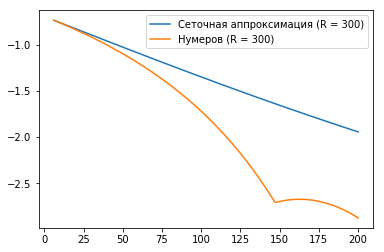

In [153]:
R = 300
N_min = 6
N_max = 200

Ns = range(N_min, N_max + 1)

err1 = list(map(lambda n: get_max_error(get_matrix, R, n), Ns))
err2 = list(map(lambda n: get_max_error(get_matrix_numerov, R, n), Ns))

Ns = [Ns] * 2
err = [err1, err2]
names = ["Сеточная аппроксимация (R = " + str(R) + ")", 
         "Нумеров (R = " + str(R) + ")"]

err = np.array(err)
err = np.log(err)

draw(Ns, err, names)